In [63]:
import pandas as pd
import seaborn as sns
import numpy as np

In [64]:
data= pd.read_csv('aps_failure_training.csv')

In [65]:
data.describe()

,aa_000
count,5.910000e+03
mean,1.517600e+05
std,3.046716e+05
min,0.000000e+00
25%,1.533500e+03
50%,3.916500e+04
75%,9.605450e+04
max,2.746564e+06


In [66]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [67]:
data.shape

(5910, 171)

In [68]:
data.replace('na',np.NaN, inplace=True)

In [69]:
missing_values=data.isna().sum()


In [70]:
dataframe_with_null = pd.DataFrame()
dataframe_with_null['columns'] = data.columns
dataframe_with_null['missing values count'] = np.asarray(data.isna().sum()) 

In [71]:
dataframe_with_null

,columns,missing values count
0,class,0
1,aa_000,0
2,ab_000,4591
3,ac_000,711
4,ad_000,1801
...,...,...
166,ee_007,69
167,ee_008,69
168,ee_009,69
169,ef_000,573


In [73]:
data.isna().sum()

class        0
aa_000       0
ab_000    4591
ac_000     711
ad_000    1801
          ... 
ee_007      69
ee_008      69
ee_009      69
ef_000     573
eg_000     573
Length: 171, dtype: int64

In [74]:
data=data[data.columns[data.isnull().mean() < 0.6]] # drop if more than 60% of the values arr missing for a column

In [75]:
data['class'].unique()

array(['neg', 'pos'], dtype=object)

In [76]:
data['class'] = data['class'].map({'neg': 0, 'pos': 1})

In [77]:
# we need to convert all the data to numeric format
data=data.apply(pd.to_numeric)

In [78]:
data.dtypes

class       int64
aa_000      int64
ac_000    float64
ad_000    float64
ae_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 164, dtype: object

In [79]:
for col in data.columns:
    data[col] = data[col].replace(np.NaN,data[col].mean())

In [80]:
data.isna().sum()

class     0
aa_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 164, dtype: int64

In [81]:
columns=data.columns
data_n = data.describe()
col_to_drop=[]

In [82]:
for x in columns:
    if (data_n[x]['std'] == 0): # check if standard deviation is zero
        col_to_drop.append(x)

In [83]:
col_to_drop # the column with std deviation zero

['cd_000']

In [84]:
data.describe()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,5910.000000,5.910000e+03,5.910000e+03,5910.000000,5910.000000,5910.000000,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,...,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5910.000000,5910.000000
mean,0.169205,1.517600e+05,3.245861e+08,601.993186,9.624629,18.175816,1.065678e+03,8.915463e+03,7.092851e+04,4.780613e+05,...,1.064102e+06,4.903287e+05,1.026954e+06,1.043511e+06,8.555994e+05,6.446877e+05,2.648559e+05,1.478455e+04,0.146524,0.380364
std,0.374964,3.046716e+05,7.181922e+08,1965.748530,122.127228,255.392997,4.512880e+04,1.070108e+05,4.482834e+05,2.005305e+06,...,2.432343e+06,1.155651e+06,2.437269e+06,2.838865e+06,2.368243e+06,2.150717e+06,9.885467e+05,9.552245e+04,5.111739,9.124845
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,1.533500e+03,2.600000e+01,62.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.071000e+03,2.376500e+03,6.423000e+03,9.888500e+03,1.488000e+03,4.745000e+02,2.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,3.916500e+04,3.080000e+02,442.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.964260e+05,1.439760e+05,3.000670e+05,2.596230e+05,1.596130e+05,7.577400e+04,1.186800e+04,0.000000e+00,0.000000,0.000000
75%,0.000000,9.605450e+04,3.245861e+08,601.993186,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.169000e+03,...,7.186130e+05,3.368485e+05,7.244240e+05,6.064475e+05,4.425935e+05,2.604090e+05,1.679025e+05,2.548500e+03,0.000000,0.000000
max,1.000000,2.746564e+06,2.130707e+09,80024.000000,5386.000000,11284.000000,3.376892e+06,4.109372e+06,1.055286e+07,2.904730e+07,...,3.123272e+07,1.454922e+07,2.700915e+07,5.743524e+07,3.160781e+07,3.413730e+07,1.926740e+07,3.810078e+06,362.000000,606.000000


In [85]:
data['class']

0       0
1       0
2       0
3       0
4       0
       ..
5905    1
5906    1
5907    1
5908    1
5909    1
Name: class, Length: 5910, dtype: int64

In [86]:
X = data.drop(['class'],axis=1)

y = data['class']

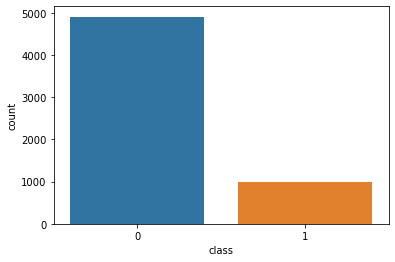

In [87]:
import seaborn as sns
sns.countplot(y)

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
sample = SMOTE()

In [90]:
X_bal,y_bal = sample.fit_resample(X,y)

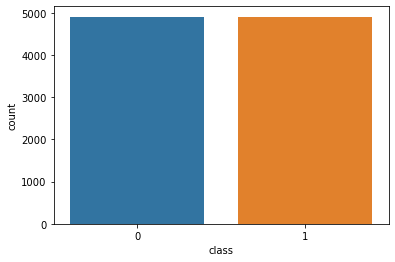

In [91]:
sns.countplot(y_bal)

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [95]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns,index=X.index)

In [96]:
X_scaled.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.246391,2.515028,-0.163816,-0.078815,-0.071174,-0.023616,-0.083321,-0.158236,-0.238418,-0.301835,...,0.072536,0.002644,-0.125524,-0.202112,-0.218089,-0.226331,-0.193869,-0.154789,-0.028667,-0.041688
1,-0.389639,-0.451987,0.000000,-0.078815,-0.071174,-0.023616,-0.083321,-0.158236,-0.238418,-0.305850,...,-0.264254,-0.270230,-0.301038,-0.281155,-0.304870,-0.262050,-0.169232,-0.139084,-0.028667,-0.041688
2,-0.363438,-0.451987,-0.255392,-0.078815,-0.071174,-0.023616,-0.083321,-0.158236,-0.238418,-0.309359,...,-0.323470,-0.286025,-0.247413,-0.223329,-0.225863,-0.226300,-0.171709,-0.149407,-0.028667,-0.041688
3,-0.498113,-0.451987,-0.272689,-0.078815,-0.032015,-0.023616,-0.083321,-0.158236,-0.238260,-0.309240,...,-0.437419,-0.424284,-0.421366,-0.367596,-0.361307,-0.299780,-0.267947,-0.154789,0.753912,3.465518
4,-0.298333,-0.451985,-0.073257,-0.078815,-0.071174,-0.023616,-0.083321,-0.158236,-0.238418,-0.300461,...,-0.181770,-0.225467,-0.255084,-0.245303,-0.240133,-0.154905,0.171072,-0.142037,-0.028667,-0.041688


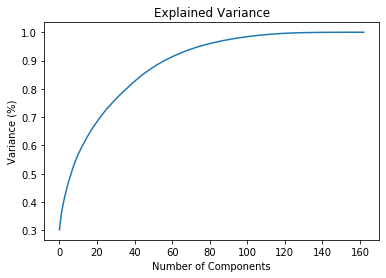

In [99]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plot.figure()
plot.plot(np.cumsum(pca.explained_variance_ratio_))
plot.xlabel('Number of Components')
plot.ylabel('Variance (%)') #for each component
plot.title('Explained Variance')
plot.show()

In [101]:
pca = PCA(n_components=100)
new_data = pca.fit_transform(X_scaled)

principal_x = pd.DataFrame(new_data,index=X_scaled.index)
principal_x

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.010182,-0.730615,-0.749643,0.613667,-0.511020,-0.381277,0.172156,-0.526034,-0.315168,0.401244,...,0.574317,0.233459,-0.223952,0.331799,-0.326571,0.267381,0.083736,0.290263,-0.181627,0.425216
1,-2.471281,-0.226756,0.071010,0.106098,-0.205778,-0.109652,0.081457,-0.175051,-0.076734,-0.195236,...,-0.109635,-0.114078,-0.036431,0.033370,0.111617,-0.082848,-0.124558,-0.222703,0.165783,0.196030
2,-2.910558,-0.236646,0.323054,-0.271688,-0.319691,0.167476,-0.187882,-0.055073,-0.186750,0.431160,...,0.039006,0.025963,-0.043372,0.041345,-0.045455,-0.003295,-0.070912,0.037607,0.037584,0.044695
3,-3.893221,-0.032993,0.669323,-0.334443,0.115691,0.312502,-0.132716,0.300123,0.810643,-0.298217,...,0.093972,0.048160,-0.064991,-0.026367,-0.001253,0.061702,0.018482,-0.140609,0.100633,0.056407
4,-2.016483,-0.153569,-0.409120,-0.027122,-0.146041,-0.016216,-0.008420,-0.356141,-0.303330,0.463904,...,0.058650,0.024262,-0.029629,0.102900,-0.079447,0.045027,-0.052621,-0.056097,0.079178,-0.077490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,18.291188,-9.106345,2.935254,2.334065,-0.308760,-3.875992,-1.598874,-0.711171,1.343502,1.754941,...,0.031217,-1.337629,0.301744,0.508512,-1.542467,0.210077,1.735156,0.916492,-0.476742,0.343711
5906,15.558847,5.181405,6.672165,-2.998986,-1.157562,-1.147307,0.217567,0.670711,-0.000893,0.172702,...,-0.099224,-1.061883,-2.030873,-0.188919,0.339917,-0.714036,0.394092,1.868477,-0.223604,0.072958
5907,16.275666,-2.407067,-6.644978,2.767912,8.903914,5.697960,7.233277,6.249941,4.173729,-3.906885,...,-0.899617,-0.710445,-1.965094,-0.669131,1.154542,-1.439197,-1.222056,0.960228,2.004547,0.305498
5908,13.205136,3.747691,5.639322,-2.251091,1.749655,0.189441,0.618048,0.387331,-0.015879,2.900457,...,0.092040,1.590741,-0.583400,2.344888,1.720925,-0.963886,0.298235,1.668792,2.535267,-1.641292


In [112]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 1/3)

In [117]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [118]:
knn = KNeighborsClassifier()

In [120]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [121]:
knn.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
from sklearn.metrics  import roc_auc_score,accuracy_score
accuracy_score(y_test, knn.predict(x_test))

0.9543147208121827